# Create dataset for STGCN Ver2

- [data](https://github.com/pinkocto/noteda/tree/main/posts/SOLAR/data)

## import

In [33]:
import pandas as pd
import numpy as np
import json
import urllib

import matplotlib.pyplot as plt

`-` solar.json

In [3]:
url = 'https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/data/solar.json'
data_dict = json.loads(urllib.request.urlopen(url).read())

In [4]:
data_dict.keys()

dict_keys(['edges', 'node_ids', 'weights', 'FX'])

In [6]:
np.array(data_dict['weights']).shape

(1892,)

`-` EPT weights

In [11]:
url2 = 'https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/data/yU_weight.csv'
yu_weight = pd.read_csv(url2)

In [12]:
yu_weight.shape

(44, 44)

In [21]:
data_dict['weights'][:10], 

([0.962366714092048,
  0.909825582944558,
  0.985656552711889,
  0.871680934662379,
  0.90065860620053,
  0.890926813199931,
  0.94308108402774,
  0.936899352767745,
  0.94447272168175,
  0.840858046009325],
 0.8927396029030008)

In [13]:
weights = []    
 
for i in range(44):
    for j in range(44):
        if i != j:
            weights.append(yu_weight.iloc[i,j]) 

In [45]:
weights[:10], 

([0.936531892351231,
  0.7910049258531,
  0.971789275111083,
  0.687837348221919,
  0.770130634080735,
  0.736971292542263,
  0.901832850136046,
  0.881446449497764,
  0.895348289525123,
  0.636585300037113],)

## Comparison

In [25]:
np.mean(data_dict['weights']), np.mean(weights)

(0.8927396029030008, 0.7271816268896101)

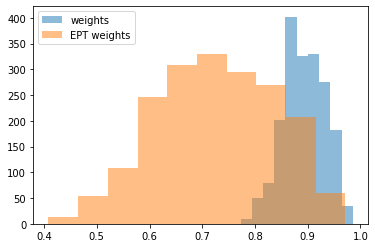

In [44]:
plt.hist(np.array(data_dict['weights']), alpha = 0.5, label = 'weights')
plt.hist(np.array(weights), alpha = 0.5, label = 'EPT weights')
plt.legend(loc='upper left')

`-` start

In [47]:
np.array(data_dict['weights']).shape

(1892,)

In [48]:
np.array(weights).shape

(1892,)

In [49]:
data_dict['weights'] = weights

In [50]:
data_dict['weights'][:10]

[0.936531892351231,
 0.7910049258531,
 0.971789275111083,
 0.687837348221919,
 0.770130634080735,
 0.736971292542263,
 0.901832850136046,
 0.881446449497764,
 0.895348289525123,
 0.636585300037113]

In [53]:
np.array(data_dict['weights']).mean()

0.7271816268896101

In [54]:
data_dict.keys()

dict_keys(['edges', 'node_ids', 'weights', 'FX'])

In [56]:
# file_path = './data/solar2.json'

In [58]:
# with open(file_path, 'w') as f:
#     json.dump(data_dict, f)

In [59]:
with open(file_path, 'r') as f:
    test = json.load(f, encoding='cp949')